# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error
)

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [2]:
data = pd.read_csv('xauusd_dataset.csv')

data

,Date,Open_0,STD5_Open_0,RSI14_Open_0,ATR14_0,High_0,Low_0
0,"Jan 22, 2010",1094.65,16.002156,48.916983,21.157143,1099.15,1082.30
1,"Jan 25, 2010",1091.05,19.140627,47.810511,20.849490,1104.20,1091.05
2,"Jan 26, 2010",1098.40,17.289563,50.283112,20.299526,1103.55,1085.80
3,"Jan 27, 2010",1097.70,6.981647,50.039957,20.117417,1102.70,1083.65
4,"Jan 28, 2010",1087.80,4.014549,46.607252,20.041173,1096.35,1074.15
...,...,...,...,...,...,...,...
3045,"Oct 01, 2021",1756.91,11.583065,45.262337,24.978090,1764.40,1749.36
3046,"Oct 04, 2021",1762.15,13.627407,47.022462,24.268227,1771.06,1747.23
3047,"Oct 05, 2021",1769.75,16.728536,49.556036,24.236925,1771.03,1748.56
3048,"Oct 06, 2021",1760.45,14.966018,46.618049,24.110716,1765.78,1745.45


In [3]:
data.drop(['Date', 'Low_0'], axis=1, inplace=True)

data

,Open_0,STD5_Open_0,RSI14_Open_0,ATR14_0,High_0
0,1094.65,16.002156,48.916983,21.157143,1099.15
1,1091.05,19.140627,47.810511,20.849490,1104.20
2,1098.40,17.289563,50.283112,20.299526,1103.55
3,1097.70,6.981647,50.039957,20.117417,1102.70
4,1087.80,4.014549,46.607252,20.041173,1096.35
...,...,...,...,...,...
3045,1756.91,11.583065,45.262337,24.978090,1764.40
3046,1762.15,13.627407,47.022462,24.268227,1771.06
3047,1769.75,16.728536,49.556036,24.236925,1771.03
3048,1760.45,14.966018,46.618049,24.110716,1765.78


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3050 entries, 0 to 3049
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open_0        3050 non-null   float64
 1   STD5_Open_0   3050 non-null   float64
 2   RSI14_Open_0  3050 non-null   float64
 3   ATR14_0       3050 non-null   float64
 4   High_0        3050 non-null   float64
dtypes: float64(5)
memory usage: 119.3 KB


### 3.1.2. Remove Missing Values (Listwise Deletion)

In [5]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [6]:
data.describe()

,Open_0,STD5_Open_0,RSI14_Open_0,ATR14_0,High_0
count,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000
mean,1414.478738,10.367017,51.314693,20.087738,1424.351515
std,231.349231,7.755037,12.470890,8.063852,233.475806
min,1051.720000,0.342146,15.305762,9.725184,1061.410000
25%,1237.570000,5.435356,43.172636,14.213261,1245.495000
50%,1322.645000,8.414743,50.841526,18.366481,1330.245000
75%,1608.822500,12.893126,59.751167,23.357835,1619.090000
max,2065.110000,89.144854,88.625173,62.066858,2073.410000


### 3.2.2. Remove Outliers

In [7]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [8]:
target_name = 'High_0'
feature_name = list(data.columns.drop(target_name))

In [9]:
X = data[feature_name]
y = data[target_name]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

# ### 5. Data Preparation

# 6. Model Creation

## 6.1. Setting Parameters

In [11]:
reg = LinearRegression()

## 6.2. Train Model

In [12]:
reg.fit(X_train, y_train)

LinearRegression()

## 6.3. Model's Weight & Bias

In [13]:
reg.coef_

array([0.99887924, 0.13293038, 0.01626235, 0.33986734])

In [14]:
reg.intercept_

2.2213912893712404

# 7. Prediction

## 7.1. Training Set

In [15]:
y_pred_train = reg.predict(X_train)

## 7.2. Test Set

In [16]:
y_pred_test = reg.predict(X_test)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [17]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.9979574268637103
mean_squared_error =		 68.82196520384022
mean_absolute_error =		 5.776159713433576
mean_absolute_percentage_error = 0.004251401689930403


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

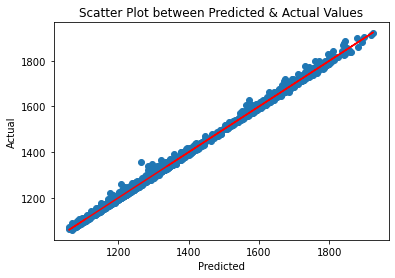

In [18]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 8.2. Test Set

### 8.2.1. Scoring

In [19]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.9965942180256306
mean_squared_error =		 99.5473403212167
mean_absolute_error =		 7.233798515240192
mean_absolute_percentage_error = 0.004214787446041677


### 8.2.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

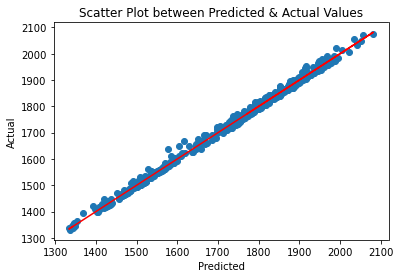

In [20]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### 8.2.3. Plot between Predicted & Actual Values (Zoom)

In [21]:
y_test = y_test.to_numpy()

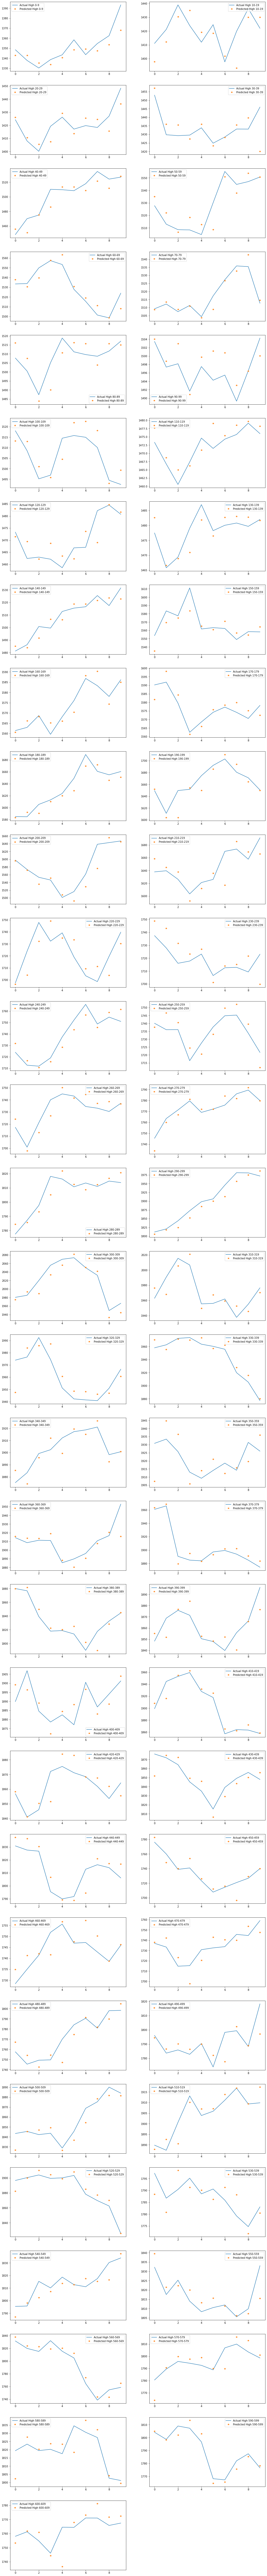

In [22]:
step = 10

import math
n_rows = int(math.ceil(len(y_test)/(2*step)))

fig = plt.figure(figsize=(18, 6*n_rows))

for i in range(0, len(y_test), step):
    start = i
    stop = min(i + step, len(y_test))
    plt.subplot(n_rows, 2, i//step + 1)
    plt.plot(y_test[start:stop], label=f'Actual High {start}-{stop-1}')
    plt.plot(y_pred_test[start:stop], '*', label=f'Predicted High {start}-{stop-1}')
    plt.legend()

# 9. Save Model

In [23]:
import pickle

In [24]:
pickle.dump((reg, feature_name), open('xauusd_model.pickle', 'wb'))